In [94]:
from postprocessing import compute_average_ROC_curve, compute_average_PR_curve, load_predictions, get_training_data
import pandas as pd
import os
import numpy as np

In [95]:
model_dir = "/home/samuele/trainend_models/emogi/2022_05_20_18_30_47_129678"
training_data = get_training_data(model_dir)

In [208]:
network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names = training_data

In [97]:
df_predictions_cv0 = pd.read_csv(os.path.join(model_dir, 'cv_0', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv1 = pd.read_csv(os.path.join(model_dir, 'cv_1', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv2 = pd.read_csv(os.path.join(model_dir, 'cv_2', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv3 = pd.read_csv(os.path.join(model_dir, 'cv_3', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)
df_predictions_cv4 = pd.read_csv(os.path.join(model_dir, 'cv_4', 'predictions.tsv'),
                                      sep='\t', header=0, index_col=0)

In [98]:
sum(df_predictions_cv0["Name"] == df_predictions_cv1["Name"])

5541

In [99]:
sum(df_predictions_cv2["Name"] == df_predictions_cv1["Name"])

5541

In [100]:
sum(df_predictions_cv2["Name"] == df_predictions_cv3["Name"])

5541

In [101]:
sum(df_predictions_cv3["Name"] == df_predictions_cv4["Name"])

5541

In [102]:
df_predictions_average = pd.DataFrame({"Name" : df_predictions_cv0["Name"]})

In [103]:
# Let's average all the probabilities of positive calssifications for each gene after 5 cross validation runs 
df_predictions_average["avg_positive_prob"] = (df_predictions_cv0["Prob_pos"] + df_predictions_cv1["Prob_pos"] + df_predictions_cv2["Prob_pos"] + df_predictions_cv3["Prob_pos"] + df_predictions_cv4["Prob_pos"])/5

In [104]:
df_predictions_average.head(20)

,Name,avg_positive_prob
ID,,
PLIN3,PLIN3,0.583
ZNF281,ZNF281,0.431
CTNNB1,CTNNB1,0.396
RFT1,RFT1,0.563
OAS1,OAS1,0.600
VKORC1,VKORC1,0.716
RPS6KA5,RPS6KA5,0.516
FA2H,FA2H,0.640
RPL23,RPL23,0.164


In [105]:
(df_predictions_cv0[df_predictions_cv0["Name"] == "SLC30A5"]["Prob_pos"] + df_predictions_cv1[df_predictions_cv0["Name"] == "SLC30A5"]["Prob_pos"] + df_predictions_cv2[df_predictions_cv0["Name"] == "SLC30A5"]["Prob_pos"] + df_predictions_cv3[df_predictions_cv0["Name"] == "SLC30A5"]["Prob_pos"] + df_predictions_cv4[df_predictions_cv0["Name"] == "SLC30A5"]["Prob_pos"])/5

ID
SLC30A5   0.583
Name: Prob_pos, dtype: float64

In [106]:
df_predictions_average_sorted = df_predictions_average.sort_values(by=['avg_positive_prob'], ascending=False)

In [107]:
df_predictions_average_sorted.head(20)

,Name,avg_positive_prob
ID,,
SERPINE1,SERPINE1,0.999
SERPINE2,SERPINE2,0.992
PIGU,PIGU,0.988
PIGK,PIGK,0.982
PIGT,PIGT,0.979
GPAA1,GPAA1,0.974
PIGS,PIGS,0.964
IFNGR1,IFNGR1,0.959
CD63,CD63,0.954


In [108]:
df_predictions_average_sorted.to_csv("df_predictions_average_sorted.csv", index=False)

In [109]:
first_100_scoring = df_predictions_average_sorted['Name'].values[:100] 
first_100_scoring

array(['SERPINE1', 'SERPINE2', 'PIGU', 'PIGK', 'PIGT', 'GPAA1', 'PIGS',
       'IFNGR1', 'CD63', 'RNF149', 'TNFRSF10B', 'ADAM10', 'YIPF6',
       'GOLGA7', 'NPC1', 'CAMLG', 'PTGFRN', 'TSPAN3', 'DNASE1L1',
       'COMMD10', 'B4GALT7', 'YIPF4', 'SERPINB6', 'TM9SF3', 'PXMP2',
       'COMMD3', 'COMMD8', 'SPCS1', 'COMMD2', 'ATG4B', 'RAB27B', 'FLVCR1',
       'TMEM106C', 'LAMP1', 'COMMD9', 'ITGB1', 'SPCS2', 'CASP8',
       'SLC29A1', 'SLC12A4', 'NDFIP1', 'COMMD5', 'ERGIC2', 'ADGRG1',
       'FASTKD5', 'SNX17', 'COMMD7', 'SLC29A2', 'ITGA3', 'LSR', 'ALCAM',
       'TRADD', 'SEC11C', 'CANX', 'SLC4A7', 'TM9SF2', 'ERGIC3', 'FAM241A',
       'FN1', 'COG1', 'ATP13A3', 'TMEM167A', 'SLC39A14', 'SLC30A1',
       'YIPF5', 'ABCC4', 'RDH14', 'SLC39A10', 'ITM2C', 'LPGAT1',
       'SLC12A6', 'KDELR2', 'CCDC93', 'TMEM106B', 'MAN1A2', 'ARAP1',
       'ITGA2', 'TFRC', 'NQO2', 'TSPAN14', 'MRC2', 'ADAM17', 'ZFPL1',
       'DGAT1', 'RNF13', 'HMOX2', 'RNF170', 'SOAT1', 'IGSF3', 'KIDINS220',
       'CD151', 'TMEM2

In [110]:
# host factors from publications

host_factors = pd.ExcelFile("/home/samuele/EMOGI/artivir_data/host_factors_from_publications.xlsx")

host_factors_dfs = {sheet_name: host_factors.parse(sheet_name) for sheet_name in host_factors.sheet_names}

In [111]:
host_factors_df = host_factors_dfs['host_factors']
host_factors_df.head()

,Reference,Assay type,Assay cell line,Method,Bait,Gene name,Uniprot accession,Functionally validated by authors
0,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AAR2,Q9Y312,NaN
1,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AARS1,P49588,NaN
2,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AASDHPPT,Q9NRN7,NaN
3,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AASS,Q9UDR5,NaN
4,Gordon et al.,Protein interactome,HEK293T,AP-MS,nsp8,AATF,Q9NY61,NaN


In [112]:
y_labels = y_train + y_val + y_test
sum(y_labels)

array([317.])

In [113]:
positive_training_genes = df_predictions_average[y_labels == 1]

In [114]:
import numpy as np
np.mean(positive_training_genes["avg_positive_prob"].values)

0.5957976458576575

In [115]:
positive_training_genes = positive_training_genes["Name"].values

In [116]:
# How many of the top 100 scoring genes are part of the training set?
counter = 0
gene_list_training = []
for gene in first_100_scoring:
    if gene in positive_training_genes:
        counter += 1
        gene_list_training.append(gene)
        
print(f"How many of the top 100 scoring genes are part of the training set? {counter}")        

How many of the top 100 scoring genes are part of the training set? 31


In [117]:
potential_host_factors = host_factors_df["Gene name"].unique()

In [118]:
# How many of the top 100 scoring genes have been detected in Baggen et al.?
counter = 0
gene_list_baggen = []
for gene in first_100_scoring:
    if gene in potential_host_factors:
        counter += 1
        gene_list_baggen.append(gene)
        
print(f"How many of the top 100 scoring genes have been detected in Baggen et al.? {counter}") 

How many of the top 100 scoring genes have been detected in Baggen et al.? 86


In [119]:
df_predictions_average_sorted[df_predictions_average_sorted["Name"].isin(gene_list_baggen)].head(20)

,Name,avg_positive_prob
ID,,
SERPINE1,SERPINE1,0.999
SERPINE2,SERPINE2,0.992
PIGU,PIGU,0.988
PIGK,PIGK,0.982
PIGT,PIGT,0.979
GPAA1,GPAA1,0.974
PIGS,PIGS,0.964
IFNGR1,IFNGR1,0.959
CD63,CD63,0.954


In [120]:
df_predictions_average_sorted[df_predictions_average_sorted["Name"].isin(gene_list_training)]

,Name,avg_positive_prob
ID,,
PIGU,PIGU,0.988
PIGT,PIGT,0.979
GPAA1,GPAA1,0.974
PIGS,PIGS,0.964
RNF149,RNF149,0.948
TNFRSF10B,TNFRSF10B,0.946
NPC1,NPC1,0.921
COMMD10,COMMD10,0.905
B4GALT7,B4GALT7,0.903


In [121]:
y_labels = [int(label) for label in y_labels]
sum(y_labels)

317

In [122]:
masks = train_mask + val_mask + test_mask
masks = [int(mask) for mask in masks]

In [123]:
sum(masks)

1268

In [124]:
negative_set = [mask^y_label for mask, y_label in zip(masks, y_labels)] 

In [125]:
sum(negative_set) == sum(y_labels)*3

True

In [126]:
df_predictions_average["training_set_positives"] = y_labels
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives
ID,,,
PLIN3,PLIN3,0.583,0
ZNF281,ZNF281,0.431,0
CTNNB1,CTNNB1,0.396,0
RFT1,RFT1,0.563,1
OAS1,OAS1,0.600,0


In [127]:
df_predictions_average["training_set_negatives"] = negative_set
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives,training_set_negatives
ID,,,,
PLIN3,PLIN3,0.583,0,0
ZNF281,ZNF281,0.431,0,0
CTNNB1,CTNNB1,0.396,0,0
RFT1,RFT1,0.563,1,0
OAS1,OAS1,0.600,0,0


In [128]:
host_factors_df.head()

,Reference,Assay type,Assay cell line,Method,Bait,Gene name,Uniprot accession,Functionally validated by authors
0,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AAR2,Q9Y312,NaN
1,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AARS1,P49588,NaN
2,Li et al.,Protein interactome,HEK293T,AP-MS,nsp10,AASDHPPT,Q9NRN7,NaN
3,Gordon et al.,Protein interactome,HEK293T,AP-MS,M,AASS,Q9UDR5,NaN
4,Gordon et al.,Protein interactome,HEK293T,AP-MS,nsp8,AATF,Q9NY61,NaN


In [129]:
publication_list = host_factors_df["Reference"].unique()

In [130]:
len(publication_list)

33

In [131]:
stukalov_genes = host_factors_df[host_factors_df["Reference"] == 'Stukalov et al.']["Gene name"].values

In [132]:
unique_genes, pub_counts = np.unique(host_factors_df["Gene name"].values, return_counts = True)

In [133]:
# I recreate the set of positives starting from Stukalov and then checking the repetitions in other indipendent publications
positive_genes = []
for u, c in zip(unique_genes, pub_counts):
    if u in stukalov_genes and c>=3:
        positive_genes.append(u)

In [134]:
len(positive_genes)

480

In [135]:
# I check that the genes in my training set correspond to the positive_genes list
counter = 0
genes_to_check = []
for gene in df_predictions_average[df_predictions_average["training_set_positives"] == 1]["Name"].values:
    if gene in positive_genes:
        counter += 1
    else:
        genes_to_check.append(gene)
not_shared_genes = len(df_predictions_average[df_predictions_average["training_set_positives"] == 1]["Name"].values) - counter     
print(f"The number of not shared genes by Stukalov is {not_shared_genes}")

The number of not shared genes by Stukalov is 40


In [136]:
# I check that all the remaining not shared genes are part of the original set of 64 not (shared by Stukalov) host factors 
#counter = 0
#for gene in genes_to_check:
#    if gene not in host_factors_experiments:
#        print("not ok")

In [137]:
ordered_gene_array = df_predictions_average["Name"].values

In [138]:
counts_list = np.zeros(len(ordered_gene_array)).astype(int)

In [139]:
# Assign number of repetitions in publications to the same order of df_predictions_average
for u, c in zip(unique_genes, pub_counts):
    index = np.where(ordered_gene_array == u)
    if len(index[0]) > 0:
        counts_list[index[0][0]] = c
    

In [140]:
counts_list

array([ 0,  0,  1, ..., 20,  2,  0])

In [141]:
df_predictions_average["publication_counts"] = counts_list

In [142]:
df_predictions_average.head()

,Name,avg_positive_prob,training_set_positives,training_set_negatives,publication_counts
ID,,,,,
PLIN3,PLIN3,0.583,0,0,0
ZNF281,ZNF281,0.431,0,0,0
CTNNB1,CTNNB1,0.396,0,0,1
RFT1,RFT1,0.563,1,0,16
OAS1,OAS1,0.600,0,0,1


In [143]:
np.mean(network)

0.005104400176353745

In [144]:
# read a not normalized network
import gcnIO

In [145]:
df_string_ppi = pd.read_csv("/home/samuele/EMOGI/artivir_data/data_preprocessing_pipeline/df_string_transcriptomics_proteomics.zip")

In [146]:
df_string_ppi.head()

,protein1,protein2,experimental,database,textmining,combined_score,gene_name_1,gene_name_2
0,9606.ENSP00000000233,9606.ENSP00000264718,157,0,0,156,ARF5,GPN1
1,9606.ENSP00000000233,9606.ENSP00000346046,178,0,0,177,ARF5,RPS17
2,9606.ENSP00000000233,9606.ENSP00000354876,153,0,0,152,ARF5,MT-CO2
3,9606.ENSP00000000233,9606.ENSP00000381607,169,0,0,169,ARF5,GSTP1
4,9606.ENSP00000000233,9606.ENSP00000426909,181,0,0,181,ARF5,RACK1


In [147]:
#df_predictions_average.to_csv('df_predictions_average.zip', index=False, compression = dict(method='zip',archive_name='df_predictions_average.csv'))

In [148]:
#network, features, y_train, y_val, y_test, train_mask, val_mask, test_mask, node_names, feat_names 

In [149]:
print(f"Percentage of links on the total: {(np.sum(network != 0)/np.sum(network == 0))*100}%")

Percentage of links on the total: 1.6892723376835652%


In [150]:
# Percentage of positives among the neighbours of positive labeled
np.shape(network)

(5541, 5541)

In [151]:
sum(y_labels)

317

In [152]:
positive_indices = np.where(np.array(y_labels) == 1)[0]

In [153]:
negative_indices = np.where(np.array(negative_set) == 1)[0]

In [154]:
edges_list_indices = np.where(np.array(network) != 0)

In [155]:
edges_list_indices

(array([   0,    0,    0, ..., 5540, 5540, 5540]),
 array([  64,  196,  232, ..., 5384, 5444, 5522]))

In [156]:
np.unique(edges_list_indices[0])

array([   0,    1,    2, ..., 5538, 5539, 5540])

In [157]:
np.where(edges_list_indices[0] == 3)[0]

array([485, 486, 487, 488, 489, 490, 491, 492])

# Check Homophily

In [158]:
percentage_of_positives_connected_positives = []
percentage_of_negatives_connected_positives = []
percentage_of_positives_connected_negatives = []
percentage_of_negatives_connected_negatives = []

for connected_gene_index in np.unique(edges_list_indices[0]):
    connections_to_check = np.where(edges_list_indices[0] == connected_gene_index)[0]
    if connected_gene_index in positive_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_positives_connected_positives.append(positive_connected_counter/len(connections_to_check))        
        percentage_of_positives_connected_negatives.append(negative_connected_counter/len(connections_to_check))
        
    elif connected_gene_index in negative_indices:
        positive_connected_counter = 0
        negative_connected_counter = 0 
        for connection in connections_to_check:
            # check the first neigbours for connected_gene_index positive
            if edges_list_indices[1][connection] in positive_indices:
                positive_connected_counter += 1
            elif edges_list_indices[1][connection] in negative_indices:
                negative_connected_counter += 1
        percentage_of_negatives_connected_positives.append(positive_connected_counter/len(connections_to_check)) 
        percentage_of_negatives_connected_negatives.append(negative_connected_counter/len(connections_to_check))


In [159]:
np.mean(percentage_of_positives_connected_positives)

0.10415988218727924

In [160]:
np.mean(percentage_of_negatives_connected_positives)

0.046713682391377694

In [161]:
np.mean(percentage_of_positives_connected_negatives)

0.13451004405073289

In [162]:
np.mean(percentage_of_negatives_connected_negatives)

0.1660846400013722

In [163]:
confusion_matrix = [[np.mean(percentage_of_positives_connected_positives), np.mean(percentage_of_positives_connected_negatives)],[np.mean(percentage_of_negatives_connected_positives), np.mean(percentage_of_negatives_connected_negatives)]]
confusion_matrix

[[0.10415988218727924, 0.13451004405073289],
 [0.046713682391377694, 0.1660846400013722]]

In [164]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

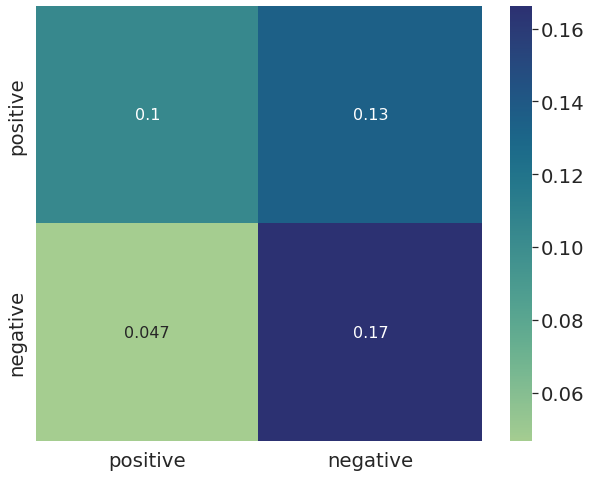

In [165]:
df_cm = pd.DataFrame(confusion_matrix, ["positive", "negative"], ["positive", "negative"])
sn.set(font_scale=1.8) # for label size
plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=sn.color_palette("crest", as_cmap=True)) # font size
plt.show()


# Check coreness of the positives Vs. the negatives

In [209]:
import networkx as nx

In [210]:
network_ones = network

In [211]:
for i in np.arange(np.shape(network)[0]):
    for j in np.arange(np.shape(network)[1]):
        if network_ones[i, j] != 0:
            network_ones[i, j] = 1

In [212]:
node_names = [ elem.decode("utf-8") for elem in node_names[:, 1]]

In [213]:
G = nx.from_pandas_adjacency(pd.DataFrame(network_ones, index=node_names, columns=node_names))

In [247]:
pos_indices = np.where(np.array(y_labels) == 1)[0]

In [259]:
pos_names = []
for index in pos_indices:
    pos_names.append(node_names[index])
len(pos_names)

317

In [256]:
neg_indices = np.where(np.array(negative_set) == 1)[0]

In [258]:
neg_names = []
for index in neg_indices:
    neg_names.append(node_names[index])
len(neg_names)

951

In [214]:
G.number_of_edges()

255018

In [215]:
G.number_of_nodes()

5541

In [216]:
G.nodes()

NodeView(('PLIN3', 'ZNF281', 'CTNNB1', 'RFT1', 'OAS1', 'VKORC1', 'RPS6KA5', 'FA2H', 'RPL23', 'CSTB', 'DTL', 'MTA1', 'SLC30A5', 'WDR82', 'CAV2', 'BMS1', 'CARM1', 'LGALS3BP', 'CEACAM6', 'POLD1', 'TDP2', 'SND1', 'UBAP1', 'ERICH5', 'BTBD11', 'FXR2', 'INF2', 'CIAO2B', 'GSTZ1', 'RPP25', 'IDH2', 'HNRNPUL1', 'LUC7L', 'GMNN', 'ABCE1', 'REPS1', 'FLYWCH1', 'DUS3L', 'PAPSS2', 'LRRC8C', 'MRPL11', 'DNASE1L1', 'CAPZA1', 'PUM2', 'NDUFV2', 'KDM1B', 'CBX3', 'SRSF7', 'AURKB', 'MAPK8', 'GCC2', 'SPATA33', 'GFM1', 'TMEM263', 'SLC25A24', 'NSFL1C', 'TMEM14C', 'RACK1', 'ISYNA1', 'PDHB', 'IPO13', 'ACYP2', 'MYL12A', 'WDR36', 'DSG2', 'FAM160B1', 'KRTCAP2', 'TTC27', 'CUL3', 'CTTNBP2NL', 'SEC61A2', 'CBR1', 'MBD2', 'PDLIM2', 'HACD3', 'SAP18', 'RANBP3', 'ZCCHC7', 'KDM5C', 'GCLM', 'ATP6V1C1', 'C17orf75', 'WRNIP1', 'DVL2', 'ARL6IP6', 'BAZ1B', 'PSMA1', 'CSNK1G2', 'IGSF8', 'ZNF579', 'AP1B1', 'RBM39', 'MAGT1', 'COQ8A', 'PARP1', 'GPX2', 'DHX38', 'EEF1E1', 'AKR1B1', 'EXD2', 'ASF1B', 'CENPH', 'PSMG3', 'GBA', 'NAE1', 'HNRNPD'

In [218]:
list(nx.k_shell(G, k = 111).nodes)

['HABP4', 'XRN2', 'CCDC124', 'TTC37', 'MTREX', 'GCN1']

In [ ]:
k_shell_dec = {}
for k in np.arange(112):
    k_shell_dec[k] = list(nx.k_shell(G, k = k).nodes)

In [225]:
k_shell_dec.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111])

In [260]:
positive_coreness_scores = []
for gene in pos_names:
    for key in k_shell_dec:
        if gene in k_shell_dec[key]:
            positive_coreness_scores.append(key)
            break
        

In [262]:
len(positive_coreness_scores)

316

In [270]:
np.mean(positive_coreness_scores)

37.31645569620253

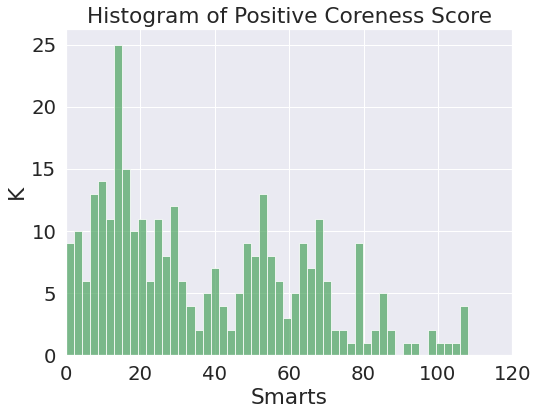

In [282]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(positive_coreness_scores, 50, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('K')
plt.title('Histogram of Positive Coreness Score')
plt.xlim(0, 120)
plt.grid(True)
plt.show()

In [263]:
negative_coreness_scores = []
for gene in neg_names:
    for key in k_shell_dec:
        if gene in k_shell_dec[key]:
            negative_coreness_scores.append(key)
            break

In [264]:
len(negative_coreness_scores)

937

In [271]:
np.mean(negative_coreness_scores)

43.184631803628605

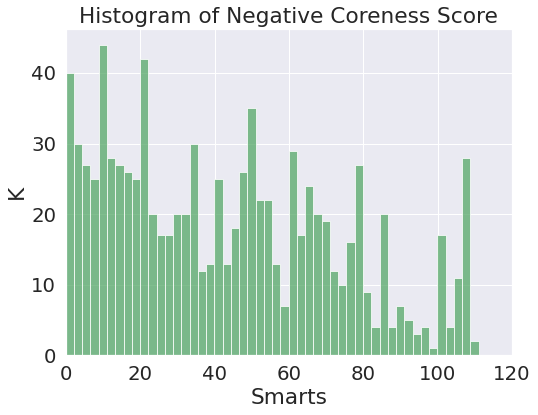

In [283]:
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(negative_coreness_scores, 50, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('K')
plt.title('Histogram of Negative Coreness Score')
plt.xlim(0, 120)
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import tensorflow as tf

/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samuele/.pyenv/versions/3.6.10/envs/jupiter-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [7]:
fasta = "/home/samuele/courses/data.fasta"

In [35]:
map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

count_positives = 0
count_total = 0
with open(fasta) as f:
    for line in f:
        if len(line.strip()) == 2:
            count_total += 1
            label = int(line.strip()[1])
            if label == 1:
                count_positives += 1
            sequence = f.readline().strip() # it reads the following line
            sequence = [map[base] for base in sequence]
            sequence = tf.one_hot(sequence, depth=4)
            #yield sequence, label
            

#print(count_positives)
#print(count_total)
    

10000
19403
